In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle

from sklearn import decomposition

# Load Data

In [2]:
dataBrut = pd.read_csv("atlas-higgs-challenge-2014-v2.csv") 
# Preview the first 5 lines of the loaded data 
dataBrut.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [3]:
#Remove bad columns

dataLabel = dataBrut.drop(["EventId","Weight","KaggleSet","KaggleWeight"], axis=1)
data = dataBrut.drop(["EventId","Weight","KaggleSet","KaggleWeight","Label"], axis=1)
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
data = data.replace(-999.0,np.nan)
dataLabel = dataLabel.replace(-999.0,np.nan)
data.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,693636.000000,818238.000000,818238.000000,818238.000000,237985.000000,237985.000000,237985.000000,818238.000000,818238.000000,818238.000000,...,818238.000000,818238.000000,818238.000000,490867.000000,490867.000000,490867.000000,237985.000000,237985.000000,237985.000000,818238.000000
mean,121.867697,49.252714,81.140561,57.849524,2.404626,372.181050,-0.828740,2.373871,18.969617,158.596159,...,-0.008634,209.908730,0.979923,84.904285,-0.001248,-0.018856,57.810286,-0.006669,-0.010470,73.205594
std,56.942487,35.378609,40.582708,63.411938,1.742546,398.235393,3.583769,0.780875,21.918491,116.089809,...,1.812703,126.816686,0.978793,60.649530,1.779419,1.815363,32.455466,2.031695,1.816033,98.331754
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-19.012000,0.208000,0.000000,46.103000,...,-3.142000,13.678000,0.000000,30.000000,-4.500000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,91.862000,19.304000,59.414000,14.164250,0.886000,112.628000,-2.626000,1.814000,2.839000,77.492000,...,-1.574000,122.985000,0.000000,44.488000,-1.337000,-1.591000,37.325000,-1.604000,-1.589000,0.000000
50%,112.501000,46.484000,73.744000,38.470000,2.101000,226.193000,-0.244000,2.492000,12.383000,120.665000,...,-0.019000,179.883000,1.000000,65.760000,0.000000,-0.044000,47.993000,-0.011000,-0.020000,40.506000
75%,135.576000,73.620000,92.188000,79.226750,3.691000,478.782000,0.945000,2.962000,27.634000,200.884500,...,1.559000,263.828000,2.000000,103.569500,1.336000,1.557000,66.695000,1.593000,1.568000,110.387000
max,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,2079.162000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


In [5]:
X_train = (dataBrut.loc[dataBrut['KaggleSet'] == 't']).drop(['EventId','KaggleSet','KaggleWeight'],axis=1)

Y_train = X_train[X_train.columns[-1]].to_numpy()
weights_train = X_train[X_train.columns[-2]].to_numpy()

X_train = X_train.drop(['Weight','Label'],axis=1).to_numpy()


In [6]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
impMedian.fit(X_train) 
X_train = impMedian.transform(X_train)

In [7]:
X_test = (dataBrut.loc[dataBrut['KaggleSet'] != 't']).drop(['EventId','KaggleSet','KaggleWeight'],axis=1)

Y_test = X_test[X_test.columns[-1]].to_numpy()

weights_test = X_test[dataLabel.columns[29]].to_numpy()
X_test = X_test.drop(['Weight','Label'],axis=1).to_numpy()

In [8]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
impMedian.fit(X_test) 
X_test = impMedian.transform(X_test)

# PCA

In [9]:
"""
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
X = pca.transform(X_train)


y = []
for w in Y_train :
    if w == 'b':
        y.append(0)
    else : 
        y.append(1)
y=np.array(y)
#
for name, label in [('Background', 0), ('Boson Higgs', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
#

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Greens',
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
"""

"\nfig = plt.figure(1, figsize=(4, 3))\nplt.clf()\nax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)\nplt.cla()\npca = decomposition.PCA(n_components=3)\npca.fit(X_train)\nX = pca.transform(X_train)\n\n\ny = []\nfor w in Y_train :\n    if w == 'b':\n        y.append(0)\n    else : \n        y.append(1)\ny=np.array(y)\n#\nfor name, label in [('Background', 0), ('Boson Higgs', 1), ('Virginica', 2)]:\n    ax.text3D(X[y == label, 0].mean(),\n              X[y == label, 1].mean() + 1.5,\n              X[y == label, 2].mean(), name,\n              horizontalalignment='center',\n              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))\n#\n\nax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Greens',\n           edgecolor='k')\n\nax.w_xaxis.set_ticklabels([])\nax.w_yaxis.set_ticklabels([])\nax.w_zaxis.set_ticklabels([])\n\nplt.show()\n"

In [9]:
def sample(X_train,Y_train,prc):
    inds = np.arange(len(X_train))
    shuffle(inds)
    prc = int(len(inds)*prc)
    X_new = X_train[inds[:prc]]
    Y_new = Y_train[inds[:prc]]

    return X_new,Y_new
def data_labels2D(X,Y_new):
    Xb = []
    Xs = []
    for i,y in enumerate(Y_new):
        if y == 'b':
            Xb.append(X[i])
        else : 
            Xs.append(X[i])

    Xb = np.array(Xb)
    Xb = Xb.T
    Xb1 = Xb[0]
    Xb2 = Xb[1]
    Xs = np.array(Xs)
    Xs = Xs.T
    Xs1 = Xs[0]
    Xs2 = Xs[1]
    return Xb1,Xb2,Xs1,Xs2

def data_labels3D(X,Y_new):
    Xb = []
    Xs = []
    for i,y in enumerate(Y_new):
        if y == 'b':
            Xb.append(X[i])
        else : 
            Xs.append(X[i])

    Xb = np.array(Xb)
    Xb = Xb.T
    Xb1 = Xb[0]
    Xb2 = Xb[1]
    Xb3 = Xb[2]
    Xs = np.array(Xs)
    Xs = Xs.T
    Xs1 = Xs[0]
    Xs2 = Xs[1]
    Xs3 = Xs[2]
    return Xb1,Xb2,Xb3,Xs1,Xs2,Xs3
    

"\ny = []\nfor w in Y_train :\n    if w == 'b':\n        y.append(0)\n    else : \n        y.append(1)\ny=np.array(y)\n"

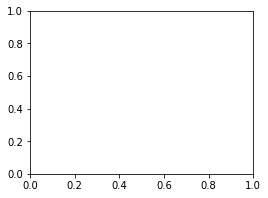

In [10]:
X_new,Y_new = sample(X_train,Y_train,0.2)




fig = plt.figure(1, figsize=(4, 3))
plt.clf()
plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X_new)
X = pca.transform(X_new)
Xb1,Xb2,Xs1,Xs2 = data_labels2D(X,Y_new)

"""
y = []
for w in Y_train :
    if w == 'b':
        y.append(0)
    else : 
        y.append(1)
y=np.array(y)
"""



In [11]:
print(pca.explained_variance_ratio_)

[0.74326319 0.176474  ]


In [26]:
len(Xb1)

164333

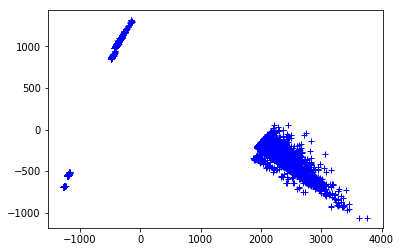

In [12]:
plt.plot(Xs1,Xs2,'b+')

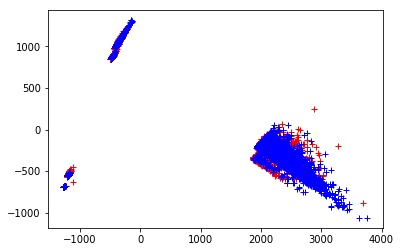

In [13]:
plt.figure()
plt.plot(Xb1,Xb2,'r+',Xs1,Xs2,'b+')

In [16]:
variances = pca.explained_variance_ratio_ 
print(variances)
print(variances.sum())

[0.74326319 0.176474  ]
0.9197371938210437


array([1981371.12003338,  470439.6690486 ])

## 3D

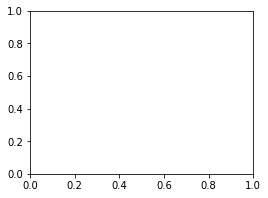

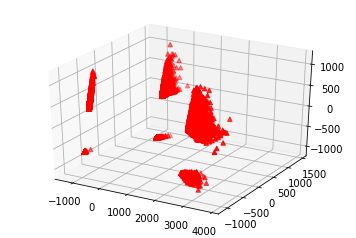

In [23]:
X_new,Y_new = sample(X_train,Y_train,1)
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_new)
X = pca.transform(X_new)
Xb1,Xb2,Xb3,Xs1,Xs2,Xs3 = data_labels3D(X,Y_new)
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(Xs1, Xs2, Xs3, marker='o',c='blue')
ax.scatter(Xb1,Xb2,Xb3, marker='^',c='red')
plt.show()

In [19]:
variances = pca.explained_variance_ratio_ 
print(variances)
print(variances.sum())

[0.74335348 0.17642584 0.05726657]
0.9770458772299819
